In [1]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# load datasets
df = pd.read_csv('datasets/loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
# check shape data
df.shape

(381, 13)

In [51]:
df['Loan_Status'].value_counts()

Y    219
N     89
Name: Loan_Status, dtype: int64

## Data Understanding

Terdapat sebuah perushaan bank swasta yang ingin memprediksi akankah seorang nasabah akan mengambil pinjaman dari bank. <br>
Dimana saya sebagai seorang data scientist harus menganalisa datasets yang tersedia serta membuat sebuah model untuk mengklasifikasikan<br>
Nasabah mengambil pinjaman atau tidak. <br>

Pertanyaan problem statement : 
- Mengklasifikasikan akankah seorang nasabah mengambil pinjaman atau tidak.
- Seperti apa ciri-ciri nasabah yang mengambil pinjaman.
- Pinjaman yang diambil akankah dipulangkan secara tepat waktu?

## Data Cleansing

Berikut adalah proses yang dilakukan pada saat membersihkan data:
- Melihat apakah terdapat missing value
- Terdapat feature atau nilai yang tidak masuk akal
- Melihat duplikasi data dan outlier pada data

In [6]:
# check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


Terdapat feature yang memiliki missing value diantaranya adalah : 
- Gender
- Dependents
- Self_Employed
- Loan_Amount_Term
- Credit_History

In [34]:
def print_missing_value(data):
    for col in data:
        print(f"{col}: {df[col].isna().sum()}")

In [36]:
print_missing_value(['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'])

Gender: 5
Dependents: 8
Self_Employed: 21
Loan_Amount_Term: 11
Credit_History: 30


In [38]:
# handling all features missing value
df.dropna(axis=0, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [40]:
# check value from features dependets
df['Dependents'].value_counts()

0     194
2      47
1      43
3+     24
Name: Dependents, dtype: int64

In [42]:
df['Education'].value_counts()

Graduate        229
Not Graduate     79
Name: Education, dtype: int64

In [45]:
# check data berdasarkan dependents
df[df['Loan_Status'] == 'N']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
11,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
12,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
14,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,LP002863,Male,Yes,3+,Graduate,No,6406,0.0,150.0,360.0,1.0,Semiurban,N
364,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N
367,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
371,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N


In [46]:
# check data berdasarkan dependents
df[df['Loan_Status'] == 'Y']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,LP002940,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,1.0,Rural,Y
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [52]:
# check statistika method
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1278.434805,104.623377,341.181818,0.853896
std,1462.359612,2520.961308,29.382256,68.246006,0.353785
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2568.750000,0.000000,89.750000,360.000000,1.000000
50%,3329.500000,871.500000,110.000000,360.000000,1.000000
75%,4291.000000,1953.500000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


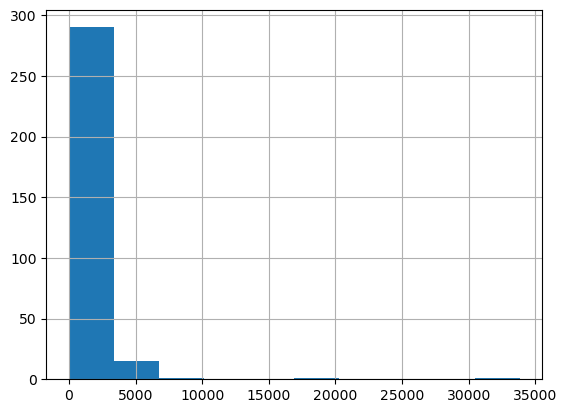

In [55]:
df['CoapplicantIncome'].hist()
plt.show()

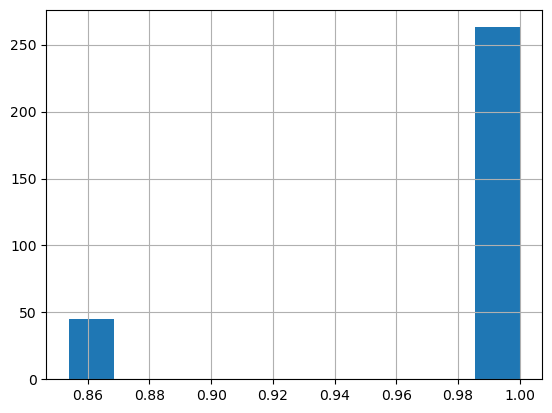

In [61]:
df['Credit_History'].hist()
plt.show()

In [57]:
# mengganti nilai yang tidak masuk akal dengan teknik imputasi
df['CoapplicantIncome'].replace({df['CoapplicantIncome'].min(): df['CoapplicantIncome'].mean()}, inplace=True)

In [59]:
df['Credit_History'].replace({df['Credit_History'].min(): df['Credit_History'].mean()}, inplace=True)

In [60]:
# check statistika method
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,308.000000,308.000000,308.000000,308.000000,308.000000
mean,3599.126623,1871.993822,104.623377,341.181818,0.978654
std,1462.359612,2289.211165,29.382256,68.246006,0.051689
min,150.000000,16.120001,9.000000,36.000000,0.853896
25%,2568.750000,1278.434805,89.750000,360.000000,1.000000
50%,3329.500000,1278.434805,110.000000,360.000000,1.000000
75%,4291.000000,1953.500000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


## EDA (Exploratory Data Analysis)

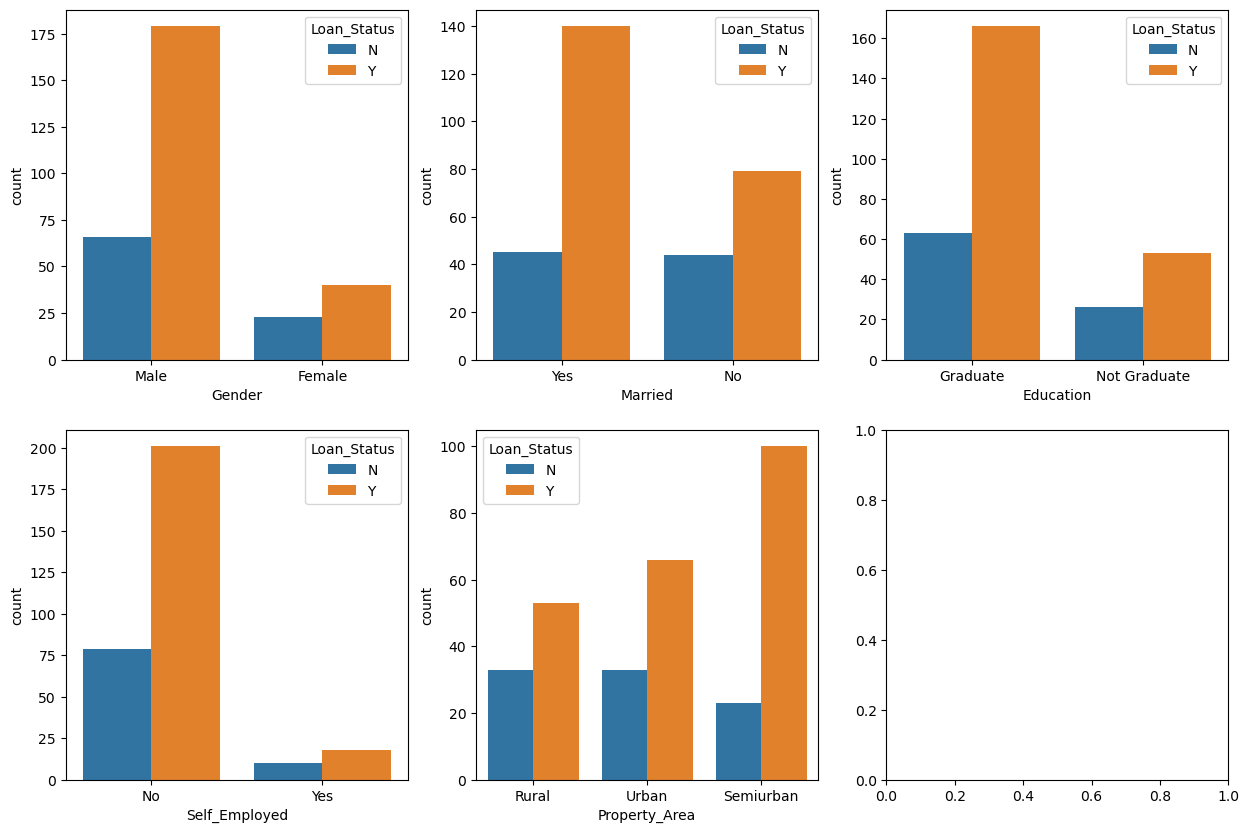

In [66]:
# check berapa banyak jumlah nasabah yang meminjam
cat_arr = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for cat, ax in zip(cat_arr, axes.flatten()):
    sns.countplot(x=cat, data=df, hue='Loan_Status', ax=ax)
plt.show()

Berdasarkan visualisasi data diatas berdasarkan dari jenis kelamin laki-laki cenderung lebih banyak mengambil pinjaman dari perempuan.<br>
Kemudian orang yang sudah menikah juga cenderung lebih banyak mengambil pinjaman juga dari orang yang belum menikah. <br>
Dimana orang yang tidak memiliki perusahaan justru lebih banyak mengambil pinjaman dibandingkan dengan orang yang memiliki perusahaan sendiri

In [68]:
# check rentang jumlah pinjaman uang
df['LoanAmount'].value_counts().sort_values(ascending=False)

100.0    13
110.0    13
120.0    12
128.0     9
113.0     9
         ..
65.0      1
143.0     1
53.0      1
62.0      1
40.0      1
Name: LoanAmount, Length: 96, dtype: int64

C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


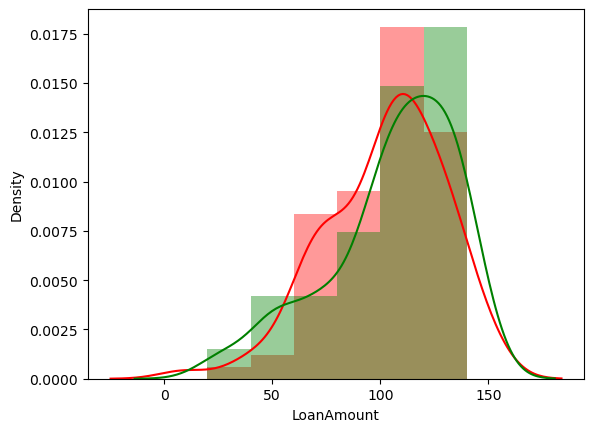

In [97]:
# melihat distribusi pinjaman yang di ambil
sns.distplot(df.LoanAmount[df.Loan_Status == 'N'], bins=[20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0], color='r', label='Tidak Bayar')
sns.distplot(df.LoanAmount[df.Loan_Status == 'Y'], bins=[20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0], color='g', label='Bayar')
plt.show()

Berdasarkan visualisasi data diatas orang akan berhasil membayar pinjaman dimana pinjaman mereka dari 25 Dollar - 65.0 Dollar.<br>
Sedangkan untuk mereka yang mengambil pinjaman diatas 70 Dollar - 125 Dollar cenderung gagal bayar.

In [86]:
df['ApplicantIncome'].value_counts().sort_values(ascending=False)

2500    6
4583    4
2600    4
3000    3
3750    3
       ..
2785    1
3593    1
3326    1
3597    1
4106    1
Name: ApplicantIncome, Length: 267, dtype: int64

C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\miniconda3\envs\jcopml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


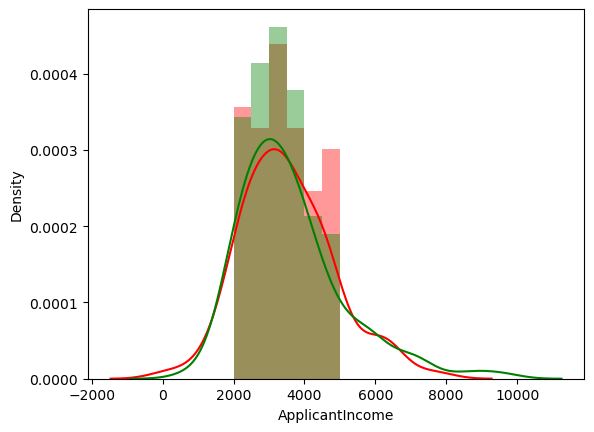

In [96]:
sns.distplot(df.ApplicantIncome[df.Loan_Status == 'N'], bins=[2000, 2500, 3000, 3500, 4000, 4500, 5000], color='r', label='Tidak Bayar')
sns.distplot(df.ApplicantIncome[df.Loan_Status == 'Y'], bins=[2000, 2500, 3000, 3500, 4000, 4500, 5000], color='g', label='Bayar')
plt.show()

Berdasarkan informasi dari visualisasi data diatas orang yang akan membayar memiliki pendapatan 3000 Dollar - 4300 Dollar.<br>
Sedangkan untuk mereka yang tidak mengambil pinjaman dengan pendapatan di atas 4000 Dollar.

In [92]:
# check credit history
df['Credit_History'].value_counts().sort_values(ascending=False)

1.000000    263
0.853896     45
Name: Credit_History, dtype: int64

In [119]:
# menghapus column yang tidak make sense
# df.drop(columns='Gender', inplace=True)

df.drop(columns=['Loan_ID'], inplace=True)

In [120]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Level
0,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N,Super Diamond
1,Yes,0,Graduate,Yes,3000,1278.434805,66.0,360.0,1.0,Urban,Y,Gold
2,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y,Super Diamond
3,No,0,Graduate,No,6000,1278.434805,141.0,360.0,1.0,Urban,Y,Super Diamond
4,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y,Diamond


In [114]:
df['Loan_Amount_Level'] = pd.cut(df['LoanAmount'], 
                                 bins=[5.0, 20.0, 40.0, 60.0, 80.0, 100.0, 153.0], 
                                 labels=['Elite', 'Bronze', 'Plattinum', 'Gold', 'Diamond', 'Super Diamond'])

In [121]:
data_final = df.copy()

In [122]:
data_final.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_Level
0,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N,Super Diamond
1,Yes,0,Graduate,Yes,3000,1278.434805,66.0,360.0,1.0,Urban,Y,Gold
2,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y,Super Diamond
3,No,0,Graduate,No,6000,1278.434805,141.0,360.0,1.0,Urban,Y,Super Diamond
4,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y,Diamond


## Train Test Split

In [123]:
df_baru = pd.read_csv('datasets/loan_data.csv')

In [362]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df_baru.drop(columns=['Loan_ID', 'Gender', 'Loan_Status'])
y = df_baru['Loan_Status'].values
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((304, 10), (77, 10), (304,), (77,))

In [369]:
# drop missing value in data train
X_train.isna().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [368]:
X_test.isna().sum()

Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [365]:
# impute missing value
X_train['Self_Employed'].fillna('No', inplace=True)
X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean(), inplace=True)

In [331]:
# drop missing value
X_train.Dependents.value_counts()

0     185
2      50
1      45
3+     16
Name: Dependents, dtype: int64

In [366]:
X_train['Credit_History'].fillna(X_train['Credit_History'].mean(), inplace=True) 
X_train['Dependents'].fillna('0', inplace=True)

In [367]:
X_test['Self_Employed'].fillna('No', inplace=True)
X_test['Credit_History'].fillna(X_test['Credit_History'].mean(), inplace=True)

In [334]:
X_test.shape

(77, 10)

In [370]:
# mengisi nilai train yang masih kosong
X_train['CoapplicantIncome'].replace({X_train['CoapplicantIncome'].min(): X_train['CoapplicantIncome'].mean()}, inplace=True)
X_train['Credit_History'].replace({X_train['Credit_History'].min(): X_train['Credit_History'].mean()}, inplace=True)

In [371]:
# mengisi nilai test yang masih kosong
X_test['CoapplicantIncome'].replace({0.0: X_test['CoapplicantIncome'].mean()}, inplace=True)
X_test['Credit_History'].replace({X_test['Credit_History'].min(): X_test['Credit_History'].mean()}, inplace=True)

In [372]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,304.000000,304.000000,304.000000,304.000000,304.000000
mean,3549.766447,1907.153918,104.296053,342.880546,0.968691
std,1468.537743,2306.900662,28.575957,65.696593,0.060134
min,150.000000,16.120001,9.000000,12.000000,0.853571
25%,2505.250000,1305.799079,88.000000,360.000000,1.000000
50%,3274.500000,1305.799079,110.000000,360.000000,1.000000
75%,4281.500000,2034.250000,125.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [315]:
X_train['CoapplicantIncome'].replace({X_train['CoapplicantIncome'].min(): X_train['CoapplicantIncome'].mean()}, inplace=True)

In [373]:
X_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,3698.597403,1694.054309,107.714286,333.194805,0.935614
std,1209.716401,817.178807,27.494907,74.379015,0.102471
min,1820.000000,754.000000,36.000000,36.000000,0.774648
25%,2876.000000,1164.662338,94.000000,360.000000,0.774648
50%,3466.000000,1250.000000,111.000000,360.000000,1.000000
75%,4400.000000,1950.000000,130.000000,360.000000,1.000000
max,7740.000000,4486.000000,150.000000,480.000000,1.000000


In [374]:
df_dummies_train = pd.get_dummies(X_train[['Married', 'Dependents',  'Education', 'Self_Employed', 'Property_Area']])
df_dummies_test = pd.get_dummies(X_test[['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']])

In [375]:
X_train.drop(columns=['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], inplace=True)
X_test.drop(columns=['Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], inplace=True)

In [376]:
X_train = pd.concat([X_train,df_dummies_train], axis='columns')
X_test = pd.concat([X_test, df_dummies_test], axis='columns')

## Modeling

In [426]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [395]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [396]:
model_lr = LogisticRegression()
model_lr.fit(X_train_std, y_train)

LogisticRegression()

In [382]:
model_knn = KNeighborsClassifier()

In [405]:
model_lr.score(X_train_std, y_train), model_lr.score(scaler.transform(X_test), y_test)

(0.7697368421052632, 0.8571428571428571)

In [421]:
param = {
    "n_neighbors": np.arange(1, 51, 2),
    "weights": ["uniform", "distance"],
    "p": [1,2]
}

grid_model = GridSearchCV(model_knn, param, cv=5, n_jobs=-1, verbose=1)
grid_model.fit(X_train_std, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=1)

In [478]:
rf = RandomForestClassifier()
param = {
    "n_estimators":np.arange(1, 51), 
    "random_state": [123], 
    "max_depth":np.arange(1, 51), 
    "min_samples_split":np.arange(2,51)
}
grid_rf = GridSearchCV(rf, param, cv=3, n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 122500 candidates, totalling 367500 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'random_state': [123]},
             verbose=1)

## Evaluate And Prediction Model

In [425]:
y_test[:20]

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [424]:
model_lr.predict(scaler.transform(X_test[:20]))

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [422]:
grid_model.score(X_train_std, y_train), grid_model.score(scaler.transform(X_test), y_test)

(1.0, 0.7662337662337663)

In [476]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9703947368421053, 0.8051948051948052)